In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

Otsu's algorithm implementation thresholding result:  131.982421875


Text(0.5, 1.0, 'Otsu Threshold')

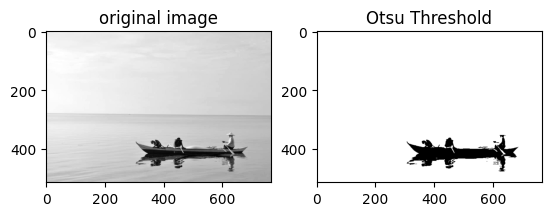

In [20]:

# Read the image in a grayscale mode
image = cv2.imread('/content/boat_initial-768x514.jpg', 0)
# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)


# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
""
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)
ret, thresh1 = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(thresh1, cmap = 'gray')
plt.title('Otsu Threshold')
